# Simple Linear Regression

### Import all the required libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We are going to import the Admission prediction dataset and for Simple Regression will use only two of the columns.

Let's use GRE score to predict the chance of admission.

In multiple regression we will look at all of the other variables.

In [73]:
dataset = pd.read_csv("dataset/Admission_predict.csv")

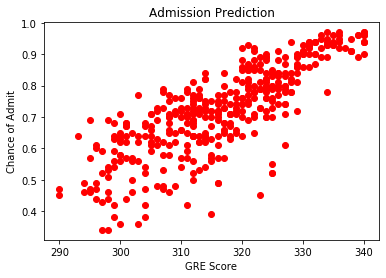

In [74]:
dataset = dataset[['GRE Score', 'Chance of Admit']]
dataset
plt.plot(dataset['GRE Score'], dataset['Chance of Admit'], 'ro')
plt.xlabel('GRE Score')
plt.ylabel("Chance of Admit")
plt.title('Admission Prediction')
plt.show()

In [75]:
def mean(values):
    return np.sum(values)/float(len(values))

In [76]:
mean([1,2,3,4,5])

# Expected Answer: 3.0

3.0

In [77]:
def variance(values, mean_x):
    return np.sum([(x - mean_x)**2 for x in values])

In [78]:
variance([1,2,3,4,5], 3.0)

# Expected Answer: 10.0

10.0

In [79]:
def covariance(x, y, mean_x, mean_y):
    return np.sum([(x[i] - mean_x)*(y[i] - mean_y) for i in range(len(x))])

In [80]:
covariance([1,2,3,4,5], [1,3,3,2,5], 3.0, 7.0)

# Expected Answer: 7.0

7.0

In [81]:
def coefficients(x, y):
    mean_x = mean(x)
    mean_y = mean(y)
    b1 = covariance(x, y, mean_x, mean_y) / variance(x, mean_x)
    b0 = mean_y - b1*mean_x
    return [np.round(b0, 3), np.round(b1, 3)]

In [110]:
coefficients([1,2,3,4,5], [1,3,3,2,5])

# Expected Answer: [0.7, 0.7]

[0.7, 0.7]

In [111]:
def simple_linear_regression(x, y, test):
    predictions = []
    #x = [row[0] for row in dataset]
    #y = [row[1] for row in dataset]
    b0, b1 = coefficients(x, y)
    
    for row in test:
        y_pred = b0 + b1*row[0]
        predictions.append(y_pred)
    return predictions

In [112]:
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        sum_error += (predicted[i] - actual[i])**2
    mean_square_error = sum_error / float(len(actual))
    return np.sqrt(mean_square_error)

In [113]:
def evaluate1(dataset, algorithm):
    test_set = list()
    for row in dataset:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    print(test_set)
    predicted = algorithm(dataset, test_set)
    print(predicted)
    actual = [row[-1] for row in dataset]
    rmse = rmse_metric(actual, predicted)
    return rmse

In [114]:
def evaluate(dataset, algorithm):
    x = dataset['GRE Score'].tolist()
    y = dataset['Chance of Admit'].tolist()
    test_set = []
    for i in x:
        test_set.append([i, None])
    predicted = algorithm(x, y, test_set)
    actual = y
    plt.plot(x,y,'ro')
    plt.plot(x,predicted)
    plt.show()
    rmse = rmse_metric(actual, predicted)
    return rmse

In [115]:
x = dataset['GRE Score'].tolist()
y = dataset['Chance of Admit'].tolist()

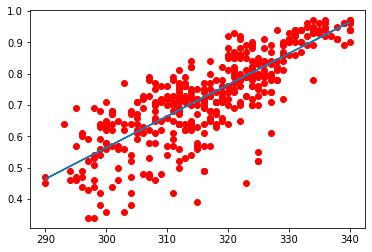

RMSE: 0.085


In [116]:
rmse = evaluate(dataset, simple_linear_regression)
print('RMSE: %.3f' % (rmse))